# Visualization

In [1]:
import pandas as pd
import texthero as hero
from collections import defaultdict
from wordcloud import WordCloud 
import numpy as np  
import random
import seaborn as sns


# read raw file
df =  pd.read_csv("df_data_Global_final.csv")

## Our team have several proposals on EDA analysis. 


1. Top words comparison before and after text clean.  
2. Summary of sentiment result after analysis
3. Top 10 countries that contribute the raw data and sentiment analysis comparison
4. Negative and Positive Sentiment results. 


## 1. frequency of occurrence of these keywords on chart for normal text, and custom hero clean text


In [2]:
#show unclean, clean text contents

df[['text','text_clean']].head(5)

,text,text_clean
0,"Sigh and wonder how the decimal on my ""concurr...",sigh wonder decimal concurrent viewers stat ch...
1,"🍔: Well, guess I should let y'all know I've be...",well guess let know depressed two weeks know m...
2,@SEGAbits McDonald's now with the depression meal,segabits mcdonald depression meal
3,@Amer1can_Barbie There is a huge difference be...,amercan barbie huge difference last years majo...
4,depression tucks me in at 7pm sharp every night,depression tucks pm sharp every night


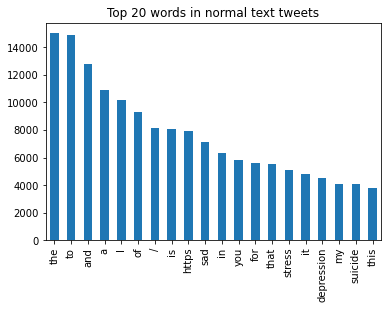

In [3]:
import matplotlib.pyplot as plt
NUM_TOP_WORDS=20
#plot with normal text tweets
top_20 = hero.visualization.top_words(df.loc[:,'text']).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=90, title="Top 20 words in normal text tweets");
plt.show()

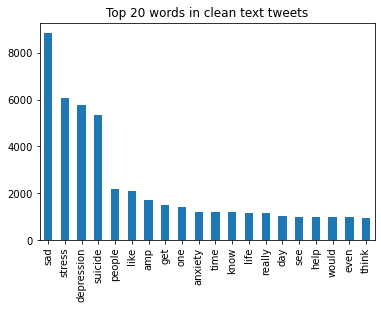

In [4]:
#plot with clean text tweets
top_20clean = hero.visualization.top_words(df['text_clean']).head(NUM_TOP_WORDS)
top_20clean.plot.bar(rot=90, title="Top 20 words in clean text tweets");
plt.show()

## 2. Top words comparison before and after text clean.  



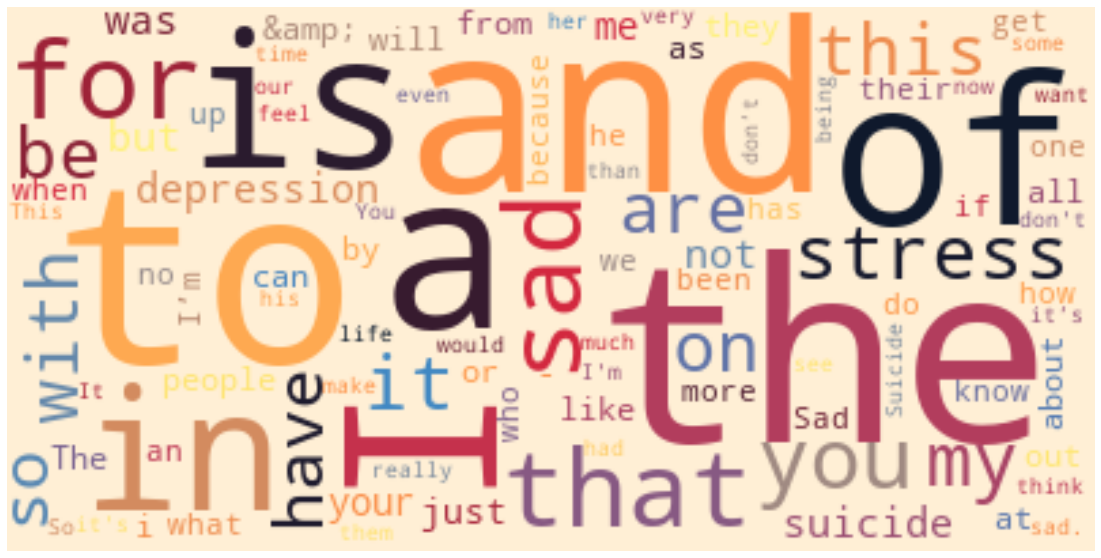

In [5]:
#plot wordcloud with normal text tweets
hero.wordcloud(df['text'], max_words=100)

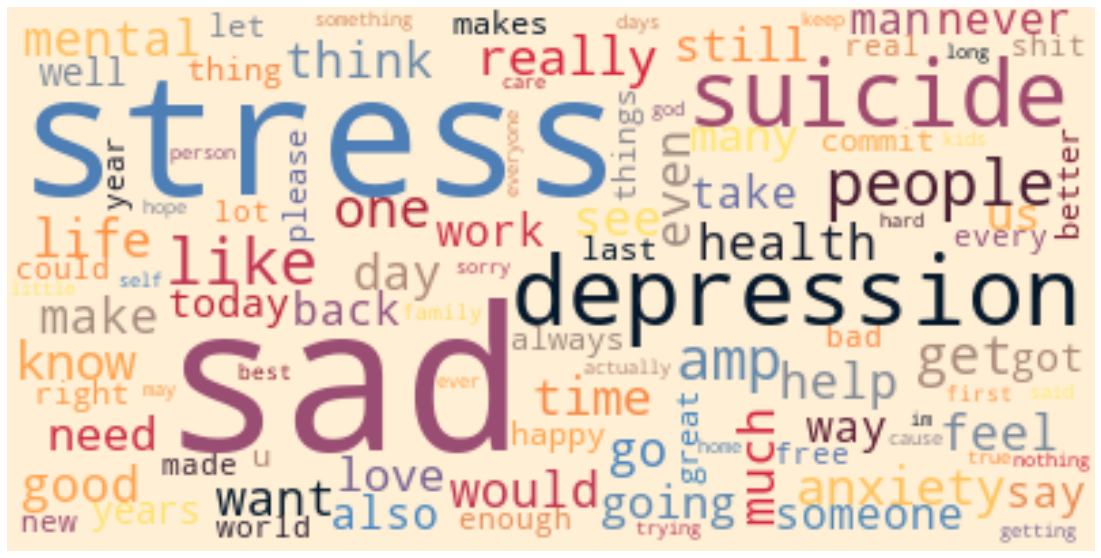

In [6]:
#plot wordcloud with clean text tweets
hero.wordcloud(df['text_clean'], max_words=100)

## 3. Summary sentiment result after flair analysis

<AxesSubplot:title={'center':'Ratio of negative depression to positive depression'}, ylabel='sentiment'>

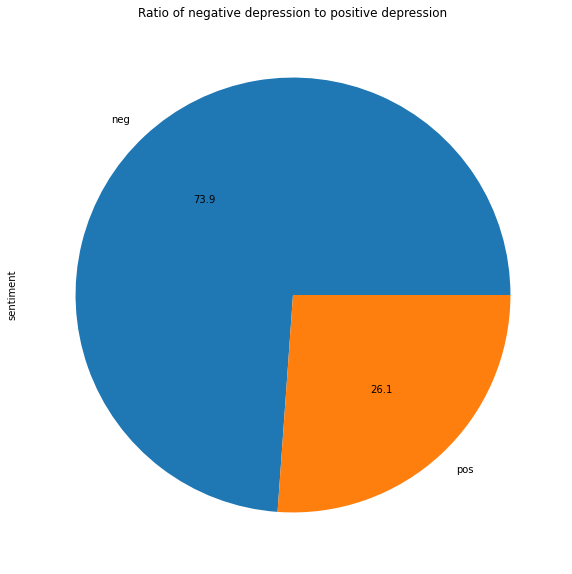

In [7]:

all_country = df['sentiment'].value_counts()[:2]
all_country.plot(kind='pie', rot=45,figsize=(18,10),autopct="%.1f", title="Ratio of negative depression to positive depression")


## 4. Top 10 countries that contribute the raw data

<AxesSubplot:title={'center':'Top 10 countries contribute the raw dataset'}>

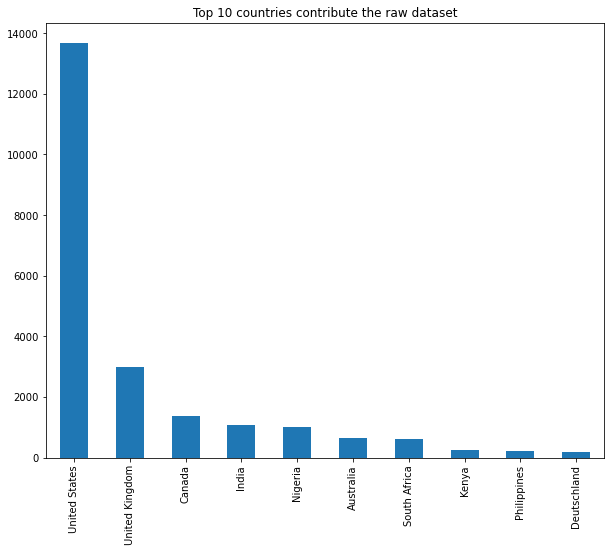

In [8]:
all_country = df['country'].value_counts()[:10]
all_country.plot(kind='bar', figsize=(10,8), rot=90, title="Top 10 countries contribute the raw dataset")


## 5. Ratio between top 10 countries on positive/negative depression

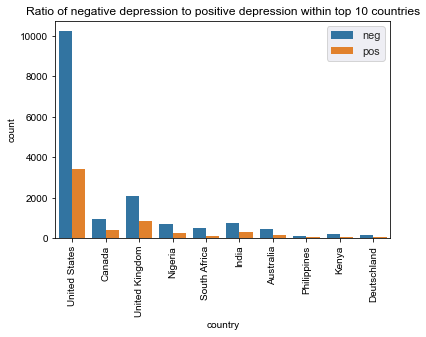

In [9]:
#Obtain top 10 countries
searchfor_top = ['United|India|Canada|Nigeria|Australia|South Africa|Kenya|Philip|Deu']
df_top20_country= df.loc[df['country'].str.contains('|'.join(searchfor_top), na=False)]


sns.countplot(x='country',hue='sentiment', data=df_top20_country)
sns.set(rc={'figure.figsize':(10,8)})
plt.xticks(rotation=90)
plt.title('Ratio of negative depression to positive depression within top 10 countries')
plt.legend(loc=1)  # 1 is code for 'upper right'3



## 6.	Negative and Positive Sentiment results. 

In [10]:
# Create a list of terms to search for negative sentiment 
searchfor = ['neg']
sentiment_neg  = df.loc[df['sentiment'].str.contains('|'.join(searchfor), na=False)]

# Create a list of terms to search for positive sentiment 
searchfor_pos = ['pos']
sentiment_pos  = df.loc[df['sentiment'].str.contains('|'.join(searchfor_pos), na=False)]


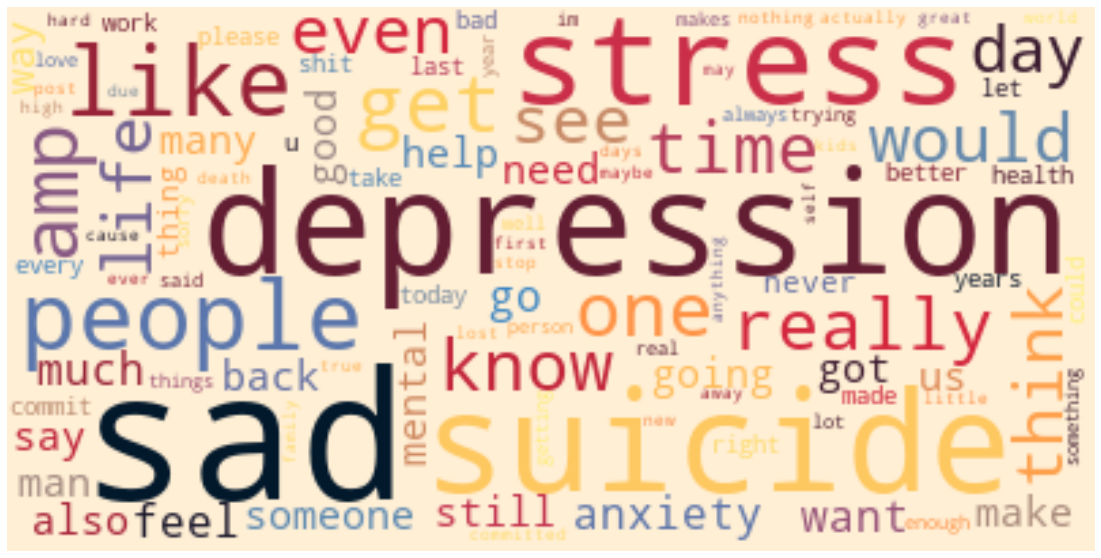

In [11]:
#plot word cloud top 100 words with negative depression. 
hero.wordcloud(sentiment_neg['text_clean'], max_words=100)

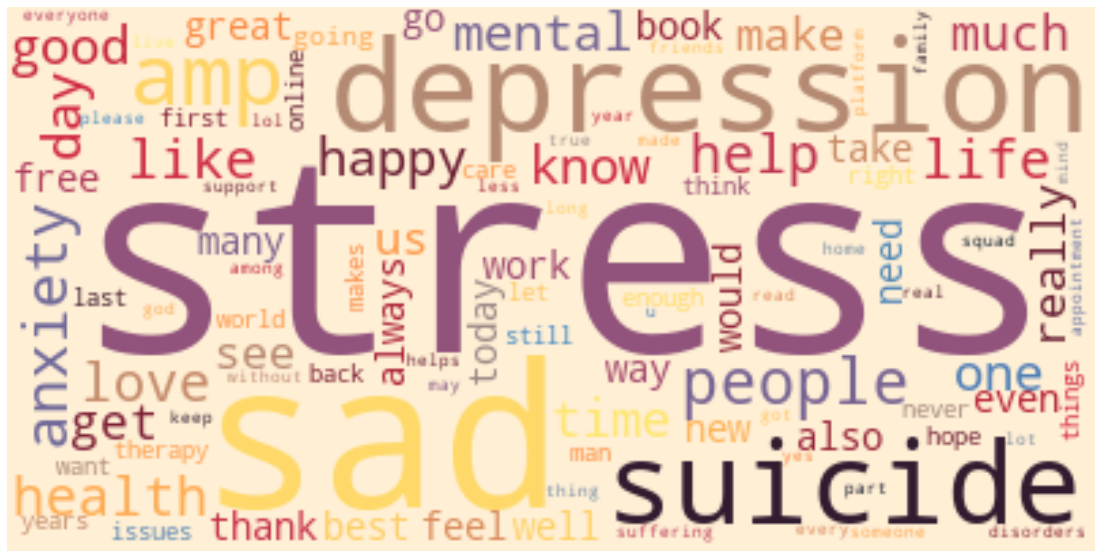

In [12]:
#plot word cloud top 100 words with positive depression. 
hero.wordcloud(sentiment_pos['text_clean'], max_words=100)